# Entregable 1: Conexión a API pública

#### Nos conectaremos a una API pública que contiene datos sobre videojuegos gratis

In [1]:
import pandas as pd
import requests

url = 'https://www.freetogame.com/api/games'
r = requests.get(url)

In [2]:
r

<Response [200]>

In [3]:
json = r.json()

In [5]:
# Convierto el resultado en un dataframe
df = pd.json_normalize(json)

In [6]:
df

,id,title,thumbnail,short_description,game_url,genre,platform,publisher,developer,release_date,freetogame_profile_url
0,540,Overwatch 2,https://www.freetogame.com/g/540/thumbnail.jpg,A hero-focused first-person team shooter from ...,https://www.freetogame.com/open/overwatch-2,Shooter,PC (Windows),Activision Blizzard,Blizzard Entertainment,2022-10-04,https://www.freetogame.com/overwatch-2
1,521,Diablo Immortal,https://www.freetogame.com/g/521/thumbnail.jpg,"Built for mobile and also released on PC, Diab...",https://www.freetogame.com/open/diablo-immortal,MMOARPG,PC (Windows),Blizzard Entertainment,Blizzard Entertainment,2022-06-02,https://www.freetogame.com/diablo-immortal
2,517,Lost Ark,https://www.freetogame.com/g/517/thumbnail.jpg,Smilegate’s free-to-play multiplayer ARPG is a...,https://www.freetogame.com/open/lost-ark,ARPG,PC (Windows),Amazon Games,Smilegate RPG,2022-02-11,https://www.freetogame.com/lost-ark
3,516,PUBG: BATTLEGROUNDS,https://www.freetogame.com/g/516/thumbnail.jpg,Get into the action in one of the longest runn...,https://www.freetogame.com/open/pubg,Shooter,PC (Windows),"KRAFTON, Inc.","KRAFTON, Inc.",2022-01-12,https://www.freetogame.com/pubg
4,508,Enlisted,https://www.freetogame.com/g/508/thumbnail.jpg,Get ready to command your own World War II mil...,https://www.freetogame.com/open/enlisted,Shooter,PC (Windows),Gaijin Entertainment,Darkflow Software,2021-04-08,https://www.freetogame.com/enlisted
...,...,...,...,...,...,...,...,...,...,...,...
371,17,Entropia Universe,https://www.freetogame.com/g/17/thumbnail.jpg,A 3D MMO Multi Virtual World Real Cash Economy...,https://www.freetogame.com/open/entropia-universe,MMORPG,PC (Windows),MindArk,MindArk,2003-01-30,https://www.freetogame.com/entropia-universe
372,432,Habbo,https://www.freetogame.com/g/432/thumbnail.jpg,One of the largest and most popular Social MMO.,https://www.freetogame.com/open/habbo,Social,Web Browser,Sulake Corporation,Sulake Corporation,2001-09-26,https://www.freetogame.com/habbo
373,336,Anarchy Online,https://www.freetogame.com/g/336/thumbnail.jpg,A free to play Sci-Fi MMO that has withstood t...,https://www.freetogame.com/open/anarchy-online,MMORPG,PC (Windows),Funcom,Funcom,2001-06-27,https://www.freetogame.com/anarchy-online
374,251,The Lord of the Rings Online,https://www.freetogame.com/g/251/thumbnail.jpg,A free to play MMORPG set in the world of J.R....,https://www.freetogame.com/open/lotro,MMORPG,PC (Windows),Warner Bros. Interactive Entertainment,"Turbine, Inc.",2001-04-24,https://www.freetogame.com/lotro


In [7]:
# Elimino columnas innecesarias
df = df.drop(['thumbnail','game_url'], axis=1)
df.head()

,id,title,short_description,genre,platform,publisher,developer,release_date,freetogame_profile_url
0,540,Overwatch 2,A hero-focused first-person team shooter from ...,Shooter,PC (Windows),Activision Blizzard,Blizzard Entertainment,2022-10-04,https://www.freetogame.com/overwatch-2
1,521,Diablo Immortal,"Built for mobile and also released on PC, Diab...",MMOARPG,PC (Windows),Blizzard Entertainment,Blizzard Entertainment,2022-06-02,https://www.freetogame.com/diablo-immortal
2,517,Lost Ark,Smilegate’s free-to-play multiplayer ARPG is a...,ARPG,PC (Windows),Amazon Games,Smilegate RPG,2022-02-11,https://www.freetogame.com/lost-ark
3,516,PUBG: BATTLEGROUNDS,Get into the action in one of the longest runn...,Shooter,PC (Windows),"KRAFTON, Inc.","KRAFTON, Inc.",2022-01-12,https://www.freetogame.com/pubg
4,508,Enlisted,Get ready to command your own World War II mil...,Shooter,PC (Windows),Gaijin Entertainment,Darkflow Software,2021-04-08,https://www.freetogame.com/enlisted


In [8]:
# Genero una columna de precio random entre 0 y 50 para tener algún valor numérico
import numpy as np

df['price'] = (np.random.rand(len(df),1).round(3) )*50

In [9]:
# Cambio columna release_date a formato de fecha
df["release_date"] = pd.to_datetime(df['release_date'], format='%Y-%m-%d', errors='coerce')

In [10]:
df

,id,title,short_description,genre,platform,publisher,developer,release_date,freetogame_profile_url,price
0,540,Overwatch 2,A hero-focused first-person team shooter from ...,Shooter,PC (Windows),Activision Blizzard,Blizzard Entertainment,2022-10-04,https://www.freetogame.com/overwatch-2,12.30
1,521,Diablo Immortal,"Built for mobile and also released on PC, Diab...",MMOARPG,PC (Windows),Blizzard Entertainment,Blizzard Entertainment,2022-06-02,https://www.freetogame.com/diablo-immortal,35.65
2,517,Lost Ark,Smilegate’s free-to-play multiplayer ARPG is a...,ARPG,PC (Windows),Amazon Games,Smilegate RPG,2022-02-11,https://www.freetogame.com/lost-ark,17.30
3,516,PUBG: BATTLEGROUNDS,Get into the action in one of the longest runn...,Shooter,PC (Windows),"KRAFTON, Inc.","KRAFTON, Inc.",2022-01-12,https://www.freetogame.com/pubg,40.15
4,508,Enlisted,Get ready to command your own World War II mil...,Shooter,PC (Windows),Gaijin Entertainment,Darkflow Software,2021-04-08,https://www.freetogame.com/enlisted,5.65
...,...,...,...,...,...,...,...,...,...,...
371,17,Entropia Universe,A 3D MMO Multi Virtual World Real Cash Economy...,MMORPG,PC (Windows),MindArk,MindArk,2003-01-30,https://www.freetogame.com/entropia-universe,25.90
372,432,Habbo,One of the largest and most popular Social MMO.,Social,Web Browser,Sulake Corporation,Sulake Corporation,2001-09-26,https://www.freetogame.com/habbo,3.70
373,336,Anarchy Online,A free to play Sci-Fi MMO that has withstood t...,MMORPG,PC (Windows),Funcom,Funcom,2001-06-27,https://www.freetogame.com/anarchy-online,25.50
374,251,The Lord of the Rings Online,A free to play MMORPG set in the world of J.R....,MMORPG,PC (Windows),Warner Bros. Interactive Entertainment,"Turbine, Inc.",2001-04-24,https://www.freetogame.com/lotro,40.35


In [11]:
# Verifico si hay valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376 entries, 0 to 375
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      376 non-null    int64         
 1   title                   376 non-null    object        
 2   short_description       376 non-null    object        
 3   genre                   376 non-null    object        
 4   platform                376 non-null    object        
 5   publisher               376 non-null    object        
 6   developer               376 non-null    object        
 7   release_date            374 non-null    datetime64[ns]
 8   freetogame_profile_url  376 non-null    object        
 9   price                   376 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 29.5+ KB


In [12]:
# Verifico que la columna id no tenga duplicados
df['id'].duplicated().any()

False

## Gráficos

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

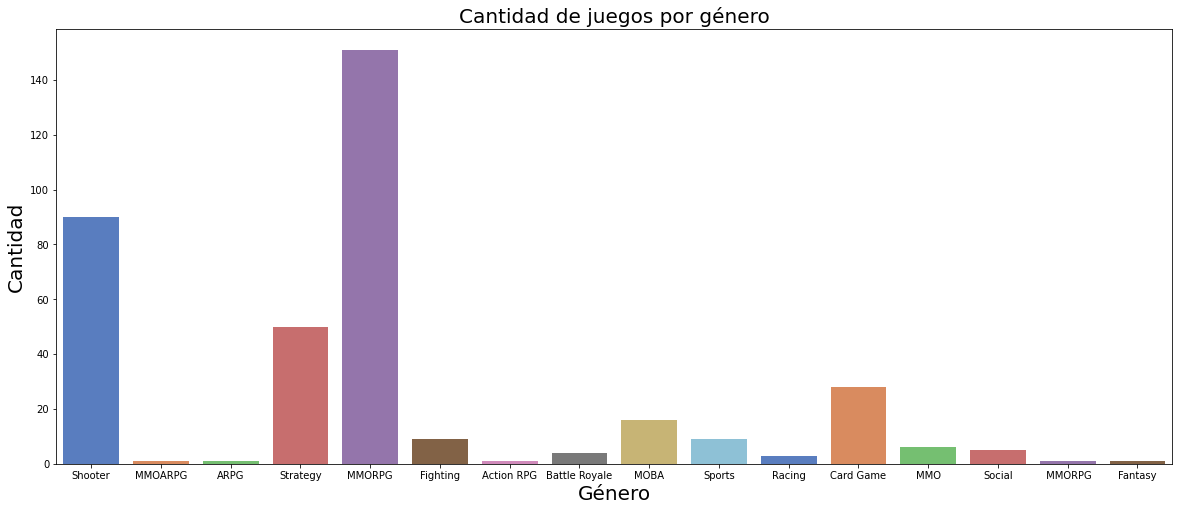

In [14]:
plt.figure(figsize=(20,8))

g = sns.countplot(data=df,
                  x="genre",
                  palette = "muted",
                 )

plt.title('Cantidad de juegos por género', size = 20)
plt.xlabel("Género", size = 20)
plt.ylabel("Cantidad", size = 20)
plt.show()

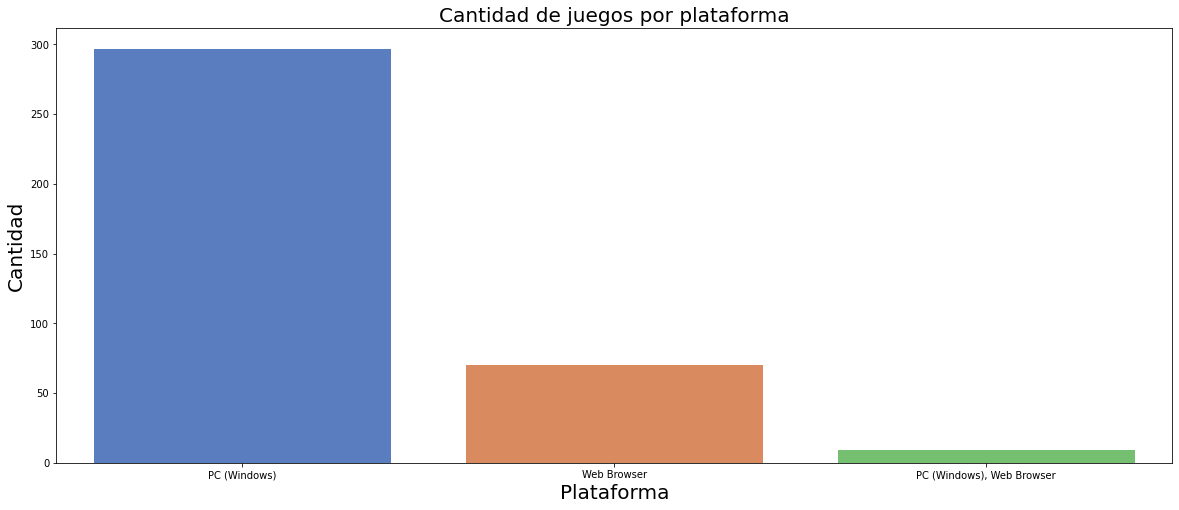

In [15]:
plt.figure(figsize=(20,8))

g = sns.countplot(data=df,
                  x="platform",
                  palette = "muted",
                 )

plt.title('Cantidad de juegos por plataforma', size = 20)
plt.xlabel("Plataforma", size = 20)
plt.ylabel("Cantidad", size = 20)
plt.show()

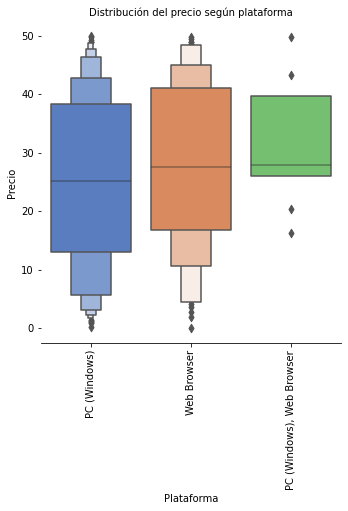

In [16]:
g = sns.catplot(data=df,
                x="platform",y="price", 
                kind="boxen",
                palette = "muted",
                height = 5 ,aspect=1)

g.despine(left=True) # Para quitar linea del Y del plot
g.set_xticklabels(rotation=90)
plt.xlabel("Plataforma",size = 10)
plt.ylabel("Precio",size =10)
plt.title('Distribución del precio según plataforma',size =10)
plt.show()

## Conexión a Redshift

In [17]:
import redshift_connector
import awswrangler as wr
import os
from dotenv import load_dotenv

load_dotenv()

# Conexión a Redshift
conn = redshift_connector.connect(
    host = os.getenv('REDSHIFT_HOST'),
    database = os.getenv('REDSHIFT_DATABASE'),
    port = int(os.getenv('REDSHIFT_PORT')),
    user = os.getenv('REDSHIFT_USER'),
    password = os.getenv('REDSHIFT_PASS')
 )

In [18]:
# Carga del dataframe
wr.redshift.to_sql(
    df=df,
    table="free_games",
    schema="juanpablo_orciuoli_coderhouse",
    con=conn,
    mode='overwrite',
    index=False,
    varchar_lengths_default = 1000
)

In [19]:
# Verifico que se haya cargado correctamente
pd.read_sql("select * from free_games", conn)

,id,title,short_description,genre,platform,publisher,developer,release_date,freetogame_profile_url,price
0,540,Overwatch 2,A hero-focused first-person team shooter from ...,Shooter,PC (Windows),Activision Blizzard,Blizzard Entertainment,2022-10-04,https://www.freetogame.com/overwatch-2,12.30
1,521,Diablo Immortal,"Built for mobile and also released on PC, Diab...",MMOARPG,PC (Windows),Blizzard Entertainment,Blizzard Entertainment,2022-06-02,https://www.freetogame.com/diablo-immortal,35.65
2,517,Lost Ark,Smilegate’s free-to-play multiplayer ARPG is a...,ARPG,PC (Windows),Amazon Games,Smilegate RPG,2022-02-11,https://www.freetogame.com/lost-ark,17.30
3,516,PUBG: BATTLEGROUNDS,Get into the action in one of the longest runn...,Shooter,PC (Windows),"KRAFTON, Inc.","KRAFTON, Inc.",2022-01-12,https://www.freetogame.com/pubg,40.15
4,508,Enlisted,Get ready to command your own World War II mil...,Shooter,PC (Windows),Gaijin Entertainment,Darkflow Software,2021-04-08,https://www.freetogame.com/enlisted,5.65
...,...,...,...,...,...,...,...,...,...,...
371,17,Entropia Universe,A 3D MMO Multi Virtual World Real Cash Economy...,MMORPG,PC (Windows),MindArk,MindArk,2003-01-30,https://www.freetogame.com/entropia-universe,25.90
372,432,Habbo,One of the largest and most popular Social MMO.,Social,Web Browser,Sulake Corporation,Sulake Corporation,2001-09-26,https://www.freetogame.com/habbo,3.70
373,336,Anarchy Online,A free to play Sci-Fi MMO that has withstood t...,MMORPG,PC (Windows),Funcom,Funcom,2001-06-27,https://www.freetogame.com/anarchy-online,25.50
374,251,The Lord of the Rings Online,A free to play MMORPG set in the world of J.R....,MMORPG,PC (Windows),Warner Bros. Interactive Entertainment,"Turbine, Inc.",2001-04-24,https://www.freetogame.com/lotro,40.35


In [20]:
conn.close()